<a href="https://colab.research.google.com/github/sutanmuleta/Enhancing-Robotic-Task-Performance-with-Reinforcement-Learning-and-Explainable-AI/blob/main/rob6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y libgl1-mesa-glx libosmesa6 libxrender1 libxext6 libgl1-mesa-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libxext6 is already the newest version (2:1.3.4-1build1).
libxrender1 is already the newest version (1:0.9.10-1build4).
libxrender1 set to manually installed.
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
The following additional packages will be installed:
  libegl-dev libgl-dev libgles-dev libgles1 libglvnd-core-dev libglvnd-dev libglx-dev libopengl-dev
The following NEW packages will be installed:
  libegl-dev libgl-dev libgl1-mesa-dev libgles-dev libgles1 libglvnd-core-dev libglvnd-dev
  libglx-dev libopengl-dev libosmesa6
0 upgraded, 10 newly installed, 0 to remove and 45 not upgraded.
Need to get 3,342 kB of archives.
After this operation, 15.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libglx-dev amd64 1.4.0-1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgl-dev amd64 1.4.0-1 [101

In [ ]:
!mkdir -p ~/.mujoco
!wget -qO- https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz | tar xvz -C ~/.mujoco


mujoco210/
mujoco210/THIRD_PARTY_NOTICES
mujoco210/bin/
mujoco210/bin/libglfw.so.3
mujoco210/bin/derivative
mujoco210/bin/libglew.so
mujoco210/bin/record
mujoco210/bin/simulate
mujoco210/bin/libglewegl.so
mujoco210/bin/testxml
mujoco210/bin/basic
mujoco210/bin/libglewosmesa.so
mujoco210/bin/libglfw3.a
mujoco210/bin/libmujoco210.so
mujoco210/bin/compile
mujoco210/bin/libmujoco210nogl.so
mujoco210/bin/testspeed
mujoco210/include/
mujoco210/include/glfw3.h
mujoco210/include/uitools.c
mujoco210/include/mjxmacro.h
mujoco210/include/mjui.h
mujoco210/include/mjrender.h
mujoco210/include/mjmodel.h
mujoco210/include/mjdata.h
mujoco210/include/mujoco.h
mujoco210/include/mjvisualize.h
mujoco210/include/uitools.h
mujoco210/model/
mujoco210/model/humanoid100.xml
mujoco210/model/arm26.xml
mujoco210/model/carpet.png
mujoco210/model/softbox.xml
mujoco210/model/grid2pin.xml
mujoco210/model/sponge.png
mujoco210/model/hammock.xml
mujoco210/model/cloth.xml
mujoco210/model/grid2.xml
mujoco210/model/grid1.x

In [ ]:
import os
os.environ['MUJOCO_PY_MUJOCO_PATH'] = '/root/.mujoco/mujoco210'
os.environ['LD_LIBRARY_PATH'] = '/root/.mujoco/mujoco210/bin:' + os.environ.get('LD_LIBRARY_PATH', '')


In [ ]:
!pip install gym==0.21.0
!pip install stable-baselines3
!pip install gymnasium-robotics
!pip install mujoco-py==2.1.2.14
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Create the CartPole environment
env = gym.make('CartPole-v1')

# Create and configure the PPO model
model = PPO("MlpPolicy", env, verbose=1)

# Train  model
model.learn(total_timesteps=10000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | 22.4     |
| time/              |          |
|    fps             | 794      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26          |
|    ep_rew_mean          | 26          |
| time/                   |             |
|    fps                  | 689         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008411767 |
|    clip_fraction        | 0.0924      |
|    clip_range           | 0.2         |
|    entropy_loss   

In [ ]:
# Test the trained model
done = False
obs = env.reset()
episode_reward = 0

while not done:
    # Predict action from the trained model
    action, _states = model.predict(obs, deterministic=True)

    # Take action in the environment
    obs, reward, done, info = env.step(action)

    # Accumulate reward
    episode_reward += reward

    # Render the environment (you can comment this out if you don't need to visualize it)
    env.render()

# Print the total reward obtained in this episode
print("Total Reward:", episode_reward)

# Close the environment
env.close()


Total Reward: 76.0


In [ ]:
num_episodes = 10
total_rewards = []

for episode in range(num_episodes):
    obs = env.reset()
    episode_reward = 0
    done = False

    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        episode_reward += reward

    total_rewards.append(episode_reward)
    print(f"Episode {episode + 1}: Total Reward = {episode_reward}")

print(f"Average Reward over {num_episodes} episodes: {np.mean(total_rewards)}")


Episode 1: Total Reward = 500.0
Episode 2: Total Reward = 500.0
Episode 3: Total Reward = 86.0
Episode 4: Total Reward = 82.0
Episode 5: Total Reward = 87.0
Episode 6: Total Reward = 500.0
Episode 7: Total Reward = 500.0
Episode 8: Total Reward = 500.0
Episode 9: Total Reward = 500.0
Episode 10: Total Reward = 500.0
Average Reward over 10 episodes: 375.5


In [ ]:
def predict_action(observations):
    actions = []
    for observation in observations:
        action, _ = model.predict(observation, deterministic=True)
        actions.append(action)
    return np.array(actions)


In [ ]:
import shap

# Sample a batch of observations to create a background dataset
observation_samples = np.array([env.observation_space.sample() for _ in range(100)])

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(predict_action, observation_samples)


  0%|          | 0/1 [00:00<?, ?it/s]

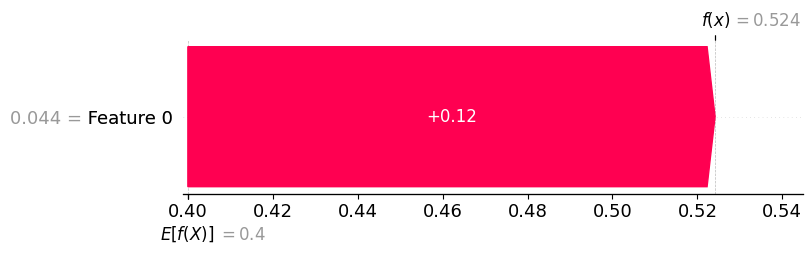

In [ ]:
import shap

# Define the prediction function for the model
def predict_action(observations):
    # Predict actions in a batch
    return np.array([model.predict(obs.reshape(1, -1), deterministic=True)[0] for obs in observations])

# Create sample observations to initialize the explainer
observation_samples = np.array([env.observation_space.sample() for _ in range(100)])

# Initialize SHAP KernelExplainer
explainer = shap.KernelExplainer(predict_action, observation_samples)

# Get a single observation to explain
obs = env.reset()

# Generate SHAP values for the single observation
# Using nsamples to control the number of evaluations for better accuracy
shap_values = explainer.shap_values(np.array([obs]), nsamples=100)

# Extract the explanation for the specific output you're interested in
# Assuming a single action output
shap_value_single = shap_values[0][0]  # Accessing the first action's SHAP values

# Prepare the data for SHAP Explanation
explanation = shap.Explanation(values=shap_value_single, base_values=explainer.expected_value[0], data=obs)

# Visualize the SHAP values using a waterfall plot
shap.waterfall_plot(explanation)


In [ ]:
# Evaluate model performance over multiple episodes
num_episodes = 10
total_rewards = []

for episode in range(num_episodes):
    obs = env.reset()
    episode_reward = 0
    done = False

    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        episode_reward += reward

    total_rewards.append(episode_reward)
    print(f"Episode {episode + 1}: Total Reward = {episode_reward}")

average_reward = np.mean(total_rewards)
print(f"Average Reward over {num_episodes} episodes: {average_reward}")


Episode 1: Total Reward = 500.0
Episode 2: Total Reward = 500.0
Episode 3: Total Reward = 99.0
Episode 4: Total Reward = 500.0
Episode 5: Total Reward = 500.0
Episode 6: Total Reward = 92.0
Episode 7: Total Reward = 124.0
Episode 8: Total Reward = 500.0
Episode 9: Total Reward = 500.0
Episode 10: Total Reward = 71.0
Average Reward over 10 episodes: 338.6


  0%|          | 0/1 [00:00<?, ?it/s]

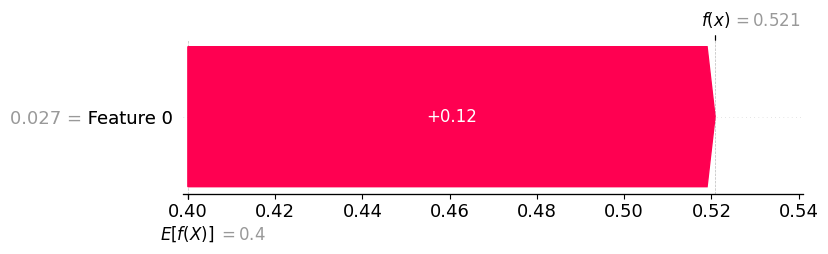

  0%|          | 0/1 [00:00<?, ?it/s]

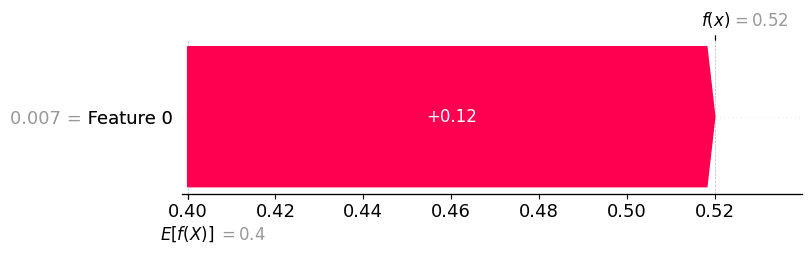

  0%|          | 0/1 [00:00<?, ?it/s]

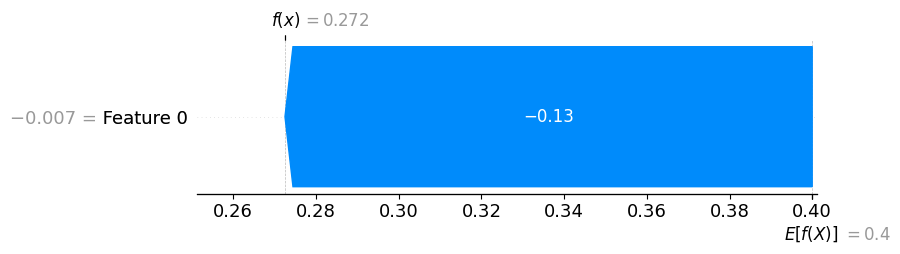

  0%|          | 0/1 [00:00<?, ?it/s]

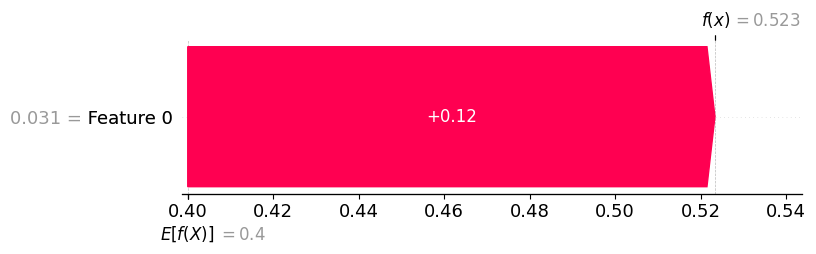

  0%|          | 0/1 [00:00<?, ?it/s]

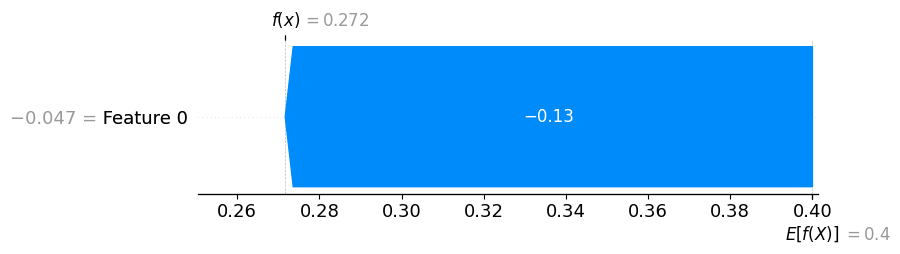

In [ ]:
# Analyze SHAP values for multiple observations
for i in range(5):
    obs = env.reset()
    shap_values = explainer.shap_values(np.array([obs]), nsamples=100)
    shap.waterfall_plot(shap.Explanation(values=shap_values[0][0], base_values=explainer.expected_value[0], data=obs))


In [ ]:
# Save the trained model
model.save("ppo_cartpole_model")


In [ ]:
from stable_baselines3 import PPO

# Load the model
loaded_model = PPO.load("ppo_cartpole_model")

# Verify the model is loaded and test it
obs = env.reset()
done = False
total_reward = 0

while not done:
    action, _states = loaded_model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    total_reward += reward

print("Total reward with loaded model:", total_reward)


Total reward with loaded model: 500.0
